In [20]:
# import pandas lib as pd 
import pandas as pd 
import plotly.express as px
from scipy import stats

In [51]:
# read by default 1st sheet of an excel file 
student_table = '../data/raw/Student_Table.xlsx'
processed_student_table = '../data/processed/Student_Table.xlsx'
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(processed_student_table, engine='xlsxwriter')

In [52]:
# Convert workbook to dataframe object.
student_table_df = pd.read_excel(student_table) 
# Convert the dataframe to an XlsxWriter Excel object for processed.
student_table_df.to_excel(writer, sheet_name='Student_Table')

In [3]:
student_table_df

,ID,School Enrolled,Months Enrolled,Birthday Month,Distance to Work (whole miles),Height (whole inches),Foot Size (whole inches),Hand Size (whole inches),Sleep (minutes),Homework (minutes)
0,1,Arts and Sciences,12,January,0,60,8,5,360,30
1,2,Applied Science and Technology,6,February,0,62,7,6,400,45
2,3,Business and Management,8,April,5,66,10,7,420,60
3,4,Nursing,10,June,10,68,12,8,440,15
4,5,Public Service,48,July,15,68,14,8,540,75
5,6,Arts and Sciences,48,June,30,70,12,9,480,120
6,7,Applied Science and Technology,36,October,32,72,11,8,320,80
7,8,Applied Science and Technology,32,November,36,75,14,7,440,60
8,9,Applied Science and Technology,15,December,37,77,13,9,420,60
9,10,Applied Science and Technology,7,July,12,62,8,6,420,60


In [12]:
tally = student_table_df["School Enrolled"].value_counts()

In [56]:
Frequency_table_df = pd.DataFrame(tally)
total_observations = sum(Frequency_table_df["School Enrolled"])
Frequency_table_df["Relative Frequency"] = Frequency_table_df["School Enrolled"]/total_observations
res = stats.cumfreq(Frequency_table_df["School Enrolled"], numbins=len(Frequency_table_df.index))
Frequency_table_df["Cumulative Frequency"] = Frequency_table_df["School Enrolled"].cumsum()
Frequency_table_df["Relative Cumulative Frequency"] = res.cumcount
Frequency_table_df.rename(columns={"School Enrolled": "Frequency"}, inplace=True)
Frequency_table_df

,Frequency,Relative Frequency,Cumulative Frequency,Relative Cumulative Frequency
Applied Science and Technology,12,0.521739,12,3.0
Arts and Sciences,3,0.130435,15,5.0
Business and Management,3,0.130435,18,5.0
Nursing,2,0.086957,20,5.0
Arts and Sciences,2,0.086957,22,5.0
Public Service,1,0.043478,23,6.0


In [53]:
# Convert the dataframe to an XlsxWriter Excel object.
Frequency_table_df.to_excel(writer, sheet_name='Frequency_Table')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

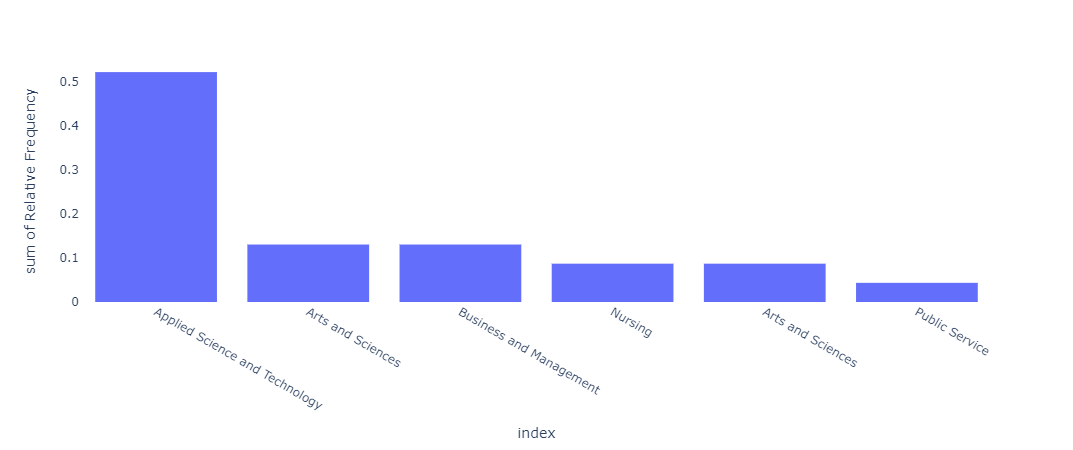

In [62]:
# Here we use a column with categorical data
fig = px.histogram(Frequency_table_df,x=Frequency_table_df.index, y="Relative Frequency", labels= Frequency_table_df.index)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()
fig.write_image("../reports/figures/student_freq.png")